In [1]:
## MARVEL CINEMATIC UNIVERSE BOX OFFICE ANALYSIS 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#IMPORTING DATA 
marvel= pd.read_csv('mcu_box_office.csv')

In [4]:
##CHANGING RElEASE DATA TO DATETIME DATA TYPE: 
marvel.release_date = pd.to_datetime(marvel.release_date)

In [5]:
##Converting last four columns to Integer types: 

##removing commas: 
def remove_commas(num): 
    return  num.replace(',', '')

marvel.production_budget = marvel.production_budget.apply(remove_commas) 
marvel.production_budget= marvel.production_budget.astype(int) 

In [6]:
marvel.opening_weekend = marvel.opening_weekend.apply(remove_commas)
marvel.opening_weekend= marvel.opening_weekend.astype(int)

marvel.domestic_box_office = marvel.domestic_box_office.apply(remove_commas)
marvel.domestic_box_office= marvel.domestic_box_office.astype(int)

marvel.worldwide_box_office = marvel.worldwide_box_office.apply(remove_commas)
marvel.worldwide_box_office= marvel.worldwide_box_office.astype(int)

In [7]:
#CREATING RELEASE COLUMNS
marvel['release_month']= marvel.release_date.dt.month 
marvel['release_day']=marvel.release_date.dt.day
marvel['release_day_of_week']=marvel.release_date.dt.dayofweek
marvel['release_year']=marvel.release_date.dt.year

In [8]:
#SETTING SEABORN PALETTES 
sns.set_style('darkgrid')
sns.set_palette('hls')

.

.

                                       DATA VISUALIZATION

## PHASE

Text(0, 0.5, 'Movie Count')

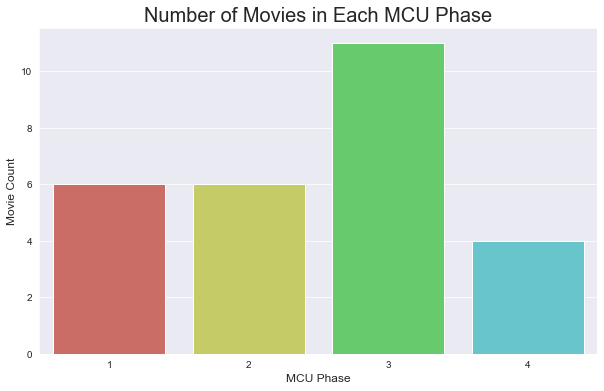

In [9]:
#NUMBER OF MOVIES IN EACH PHASE
plt.figure(figsize=(10,6))
plt.title("Number of Movies in Each MCU Phase",fontsize=20)
sns.countplot(
data=marvel, 
x='mcu_phase',)
plt.xlabel('MCU Phase',fontsize=12)
plt.ylabel("Movie Count",fontsize=12)

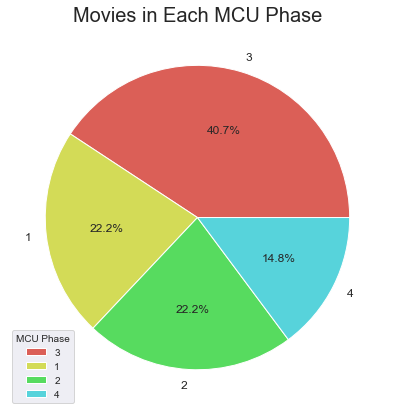

In [10]:
#PERCENTAGE OF MOVIES IN EACH PHASE
plt.figure(figsize=(7,7))
marvel.mcu_phase.value_counts().plot(kind='pie', label='',autopct='%1.1f%%', fontsize=12)
plt.title('Movies in Each MCU Phase',fontsize=20)
plt.legend(title='MCU Phase')

##### The Marvel Cinematic Universe is still in Phase 4, with many new movies set to release in the near future. 

## TOMATO METER/ROTTEN TOMATOES

Text(0, 0.5, 'Movie Counts')

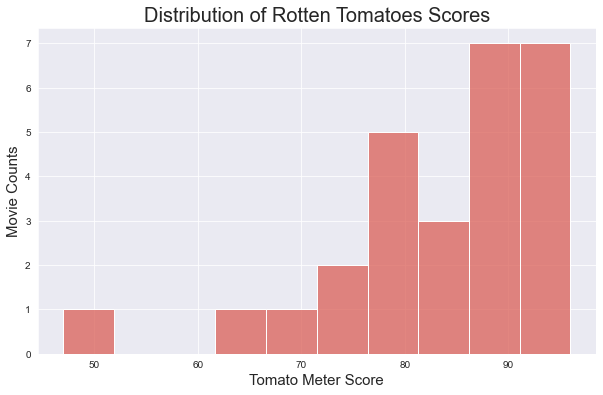

In [11]:
#Distribution of Tomato Meter Scores
plt.figure(figsize=(10,6))
sns.histplot(
data=marvel, 
x='tomato_meter',
bins=10)
plt.title('Distribution of Rotten Tomatoes Scores',fontsize=20)
plt.xlabel('Tomato Meter Score',fontsize=15)
plt.ylabel('Movie Counts',fontsize=15)


<Figure size 720x432 with 0 Axes>

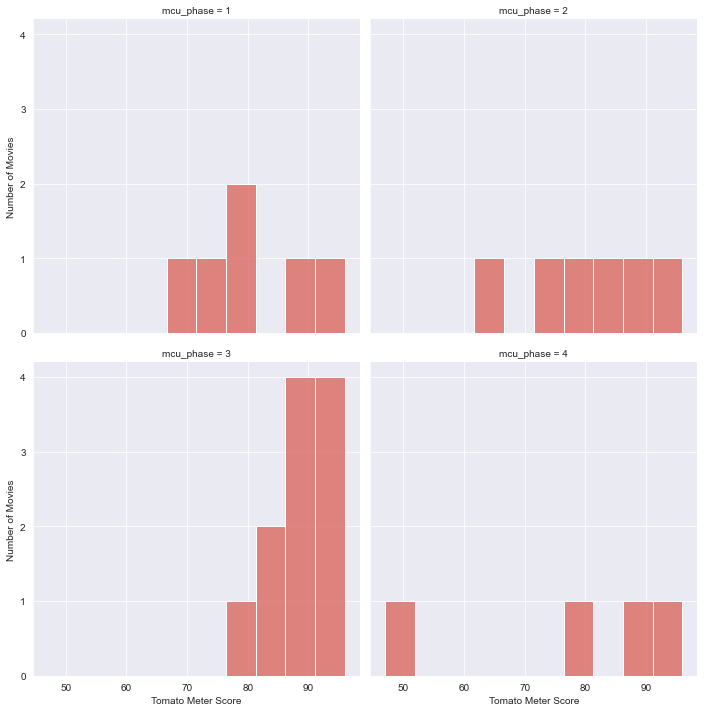

In [12]:
#Distribution of Tomato Meter Scores Separated by Phase
plt.figure(figsize=(10,6))
tom_hist= sns.displot(
kind='hist',
data=marvel, 
x='tomato_meter',
col='mcu_phase',
bins=10,
col_wrap=2
)
plt.yticks([0,1,2,3,4])
tom_hist.set_axis_labels( "Tomato Meter Score", 'Number of Movies')

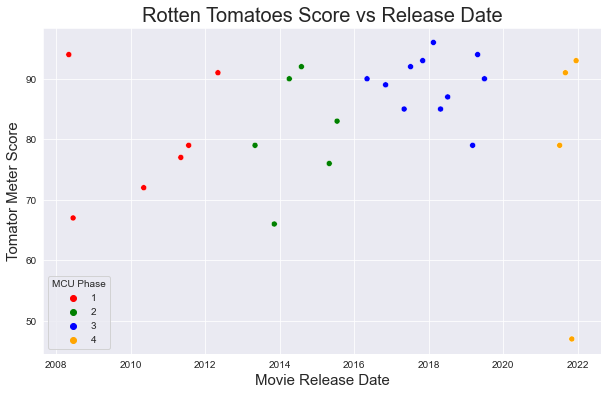

In [13]:
#Tomato Meter vs Release Date 
plt.figure(figsize=(10,6))
sns.scatterplot(
data=marvel, 
x='release_date', 
y='tomato_meter', 
hue='mcu_phase',
palette=['red','green','blue','orange'])
plt.title('Rotten Tomatoes Score vs Release Date',fontsize=20)
plt.ylabel('Tomator Meter Score',fontsize=15)
plt.xlabel('Movie Release Date',fontsize=15)
plt.legend(title='MCU Phase')

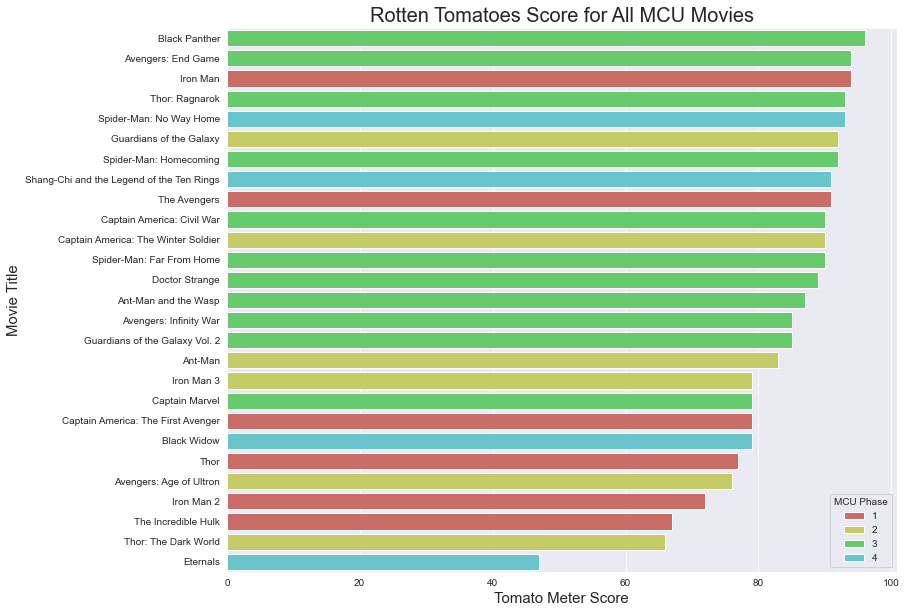

In [14]:
#ALL TOMATO METER SCORES
plt.figure(figsize=(12,10))
sns.barplot(
data=marvel, 
x='tomato_meter',
y='movie_title',
hue='mcu_phase',
dodge=False,
order=marvel.groupby('movie_title').tomato_meter.sum().sort_values(ascending=False).index
)
plt.title('Rotten Tomatoes Score for All MCU Movies',fontsize=20)
plt.xlabel('Tomato Meter Score',fontsize=15)
plt.ylabel('Movie Title',fontsize=15)
plt.legend(title='MCU Phase')

## AUDIENCE SCORE

Text(0, 0.5, 'Movie Counts')

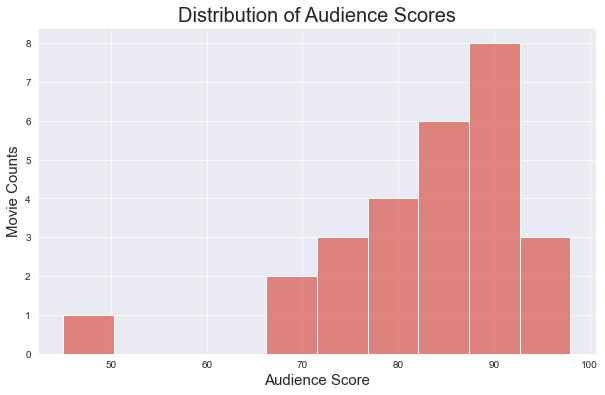

In [15]:
#DISTRIBUTION OF AUDIENCE SCORE 
plt.figure(figsize=(10,6))
sns.histplot(
data=marvel,
x='audience_score',
bins=10)
plt.title('Distribution of Audience Scores',fontsize=20)
plt.xlabel('Audience Score',fontsize=15)
plt.ylabel('Movie Counts',fontsize=15)

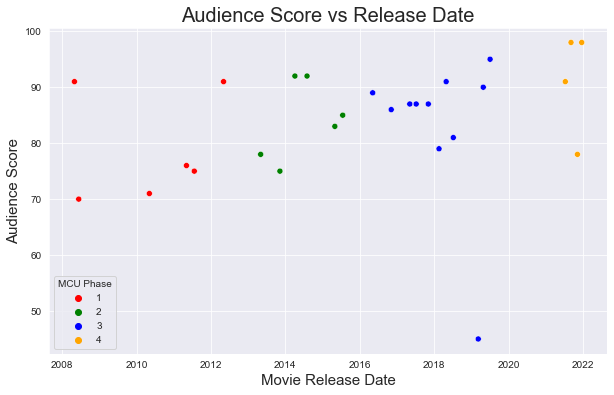

In [60]:
#Audience Score vs Release Date 
plt.figure(figsize=(10,6))
sns.scatterplot(
data=marvel, 
x='release_date', 
y='audience_score',
hue='mcu_phase',
palette=['red','green','blue','orange'])
plt.title('Audience Score vs Release Date',fontsize=20)
plt.xlabel('Movie Release Date',fontsize=15)
plt.ylabel('Audience Score',fontsize=15)
plt.legend(title='MCU Phase')

Text(16.92500000000001, 0.5, 'Audience Score')

<Figure size 720x432 with 0 Axes>

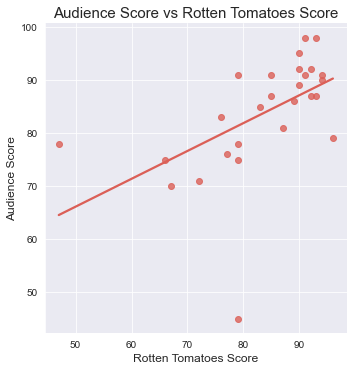

In [17]:
#AUDIENCE SCORE VS ROTTEN TOMATOES SCORE
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
x='tomato_meter', 
y='audience_score',
ci=None)
plt.title('Audience Score vs Rotten Tomatoes Score',fontsize=15)
plt.xlabel('Rotten Tomatoes Score',fontsize=12)
plt.ylabel('Audience Score',fontsize=12)

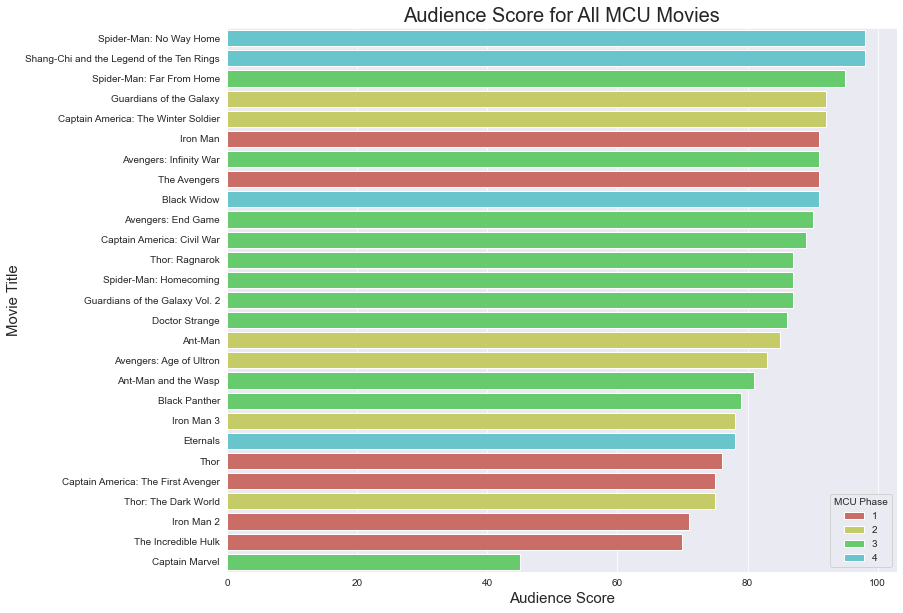

In [18]:
#AUDIENCE SCORE FOR ALL MCU MOVIES
plt.figure(figsize=(12,10))
sns.barplot(
data=marvel, 
x='audience_score',
y='movie_title',
hue='mcu_phase',
dodge=False,
order=marvel.groupby('movie_title').audience_score.sum().sort_values(ascending=False).index
)
plt.title('Audience Score for All MCU Movies',fontsize=20)
plt.xlabel('Audience Score',fontsize=15)
plt.ylabel('Movie Title',fontsize=15)
plt.legend(title='MCU Phase')

# MOVIE DURATION

Text(16.92500000000001, 0.5, 'Audience Score')

<Figure size 720x432 with 0 Axes>

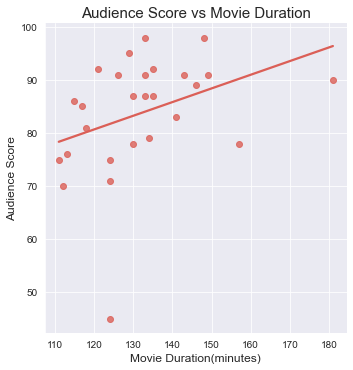

In [19]:
#Movie Duration vs Audience Score
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
x='movie_duration', 
y='audience_score',
ci=None)
plt.title('Audience Score vs Movie Duration',fontsize=15)
plt.xlabel('Movie Duration(minutes)',fontsize=12)
plt.ylabel('Audience Score',fontsize=12)

Text(22.55000000000001, 0.5, 'Tomato Meter Score')

<Figure size 720x432 with 0 Axes>

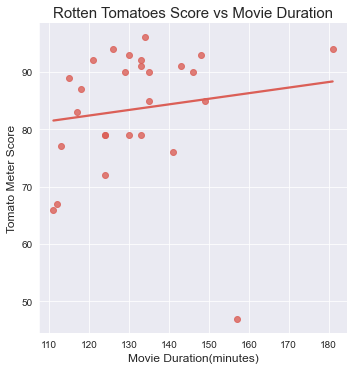

In [20]:
#Tomato Score vs Movie Duration
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
x='movie_duration', 
y='tomato_meter',
ci=None)
plt.title('Rotten Tomatoes Score vs Movie Duration',fontsize=15)
plt.xlabel('Movie Duration(minutes)',fontsize=12)
plt.ylabel('Tomato Meter Score',fontsize=12)

Text(0.5, 0, 'Release Date')

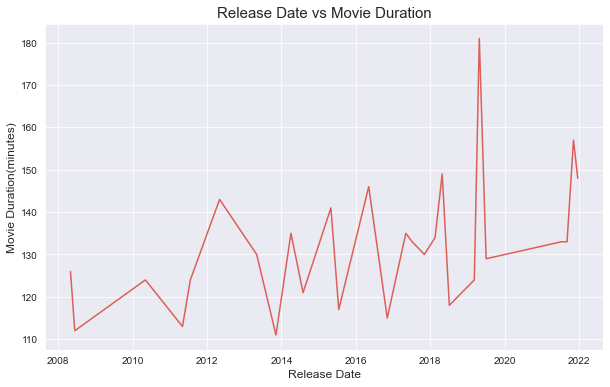

In [21]:
#Release Date Vs Movie Duration
plt.figure(figsize=(10,6))
sns.lineplot(
data=marvel, 
y='movie_duration', 
x='release_date', )
plt.title('Release Date vs Movie Duration',fontsize=15)
plt.ylabel('Movie Duration(minutes)',fontsize=12)
plt.xlabel('Release Date',fontsize=12)

([<matplotlib.axis.YTick at 0x7f84fa030ee0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

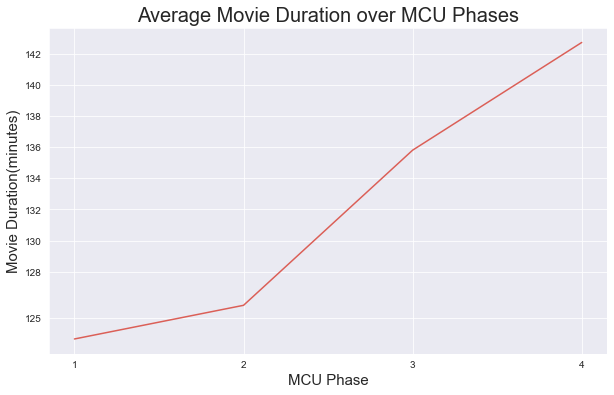

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot( 
data=marvel, 
y='movie_duration', 
x='mcu_phase',
ci=None)
plt.title('Average Movie Duration over MCU Phases',fontsize=20)
plt.ylabel('Movie Duration(minutes)',fontsize=15)
plt.xlabel('MCU Phase',fontsize=15)
plt.xticks([1,2,3,4,])
plt.yticks([125,128,130,132,134,136,138,140,142])

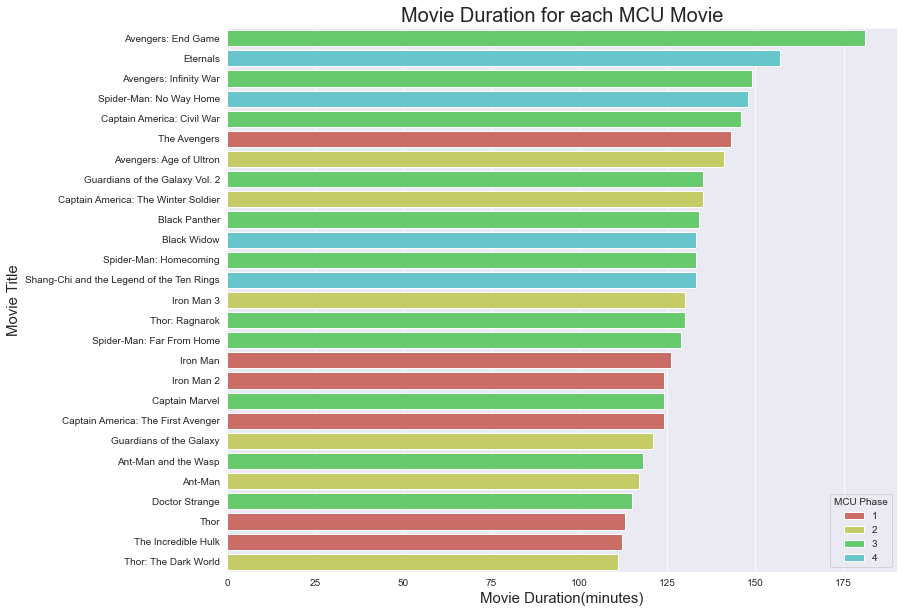

In [23]:
#LENGTH OF EACH MARVEL MOVIE
plt.figure(figsize=(12,10))
sns.barplot(
data=marvel, 
x='movie_duration',
y='movie_title',
hue='mcu_phase',
dodge=False,
order=marvel.groupby('movie_title').movie_duration.sum().sort_values(ascending=False).index
)
plt.title('Movie Duration for each MCU Movie',fontsize=20)
plt.xlabel('Movie Duration(minutes)',fontsize=15)
plt.ylabel('Movie Title',fontsize=15)
plt.legend(title='MCU Phase')

Text(0.5, 0, 'Average Movie Duration(Minutes)')

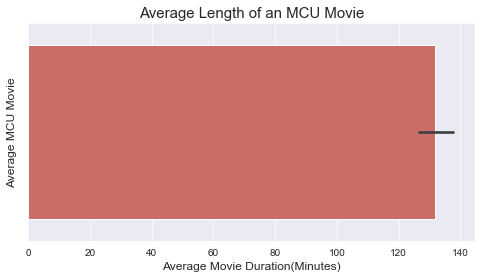

In [61]:
#AVERAGE LENGTH OF AN MCU MOVIE
plt.figure(figsize=(8,4))
sns.barplot( 
data=marvel, 
x='movie_duration',
hue='mcu_phase')
plt.title('Average Length of an MCU Movie',fontsize=15)
plt.ylabel('Average MCU Movie',fontsize=12),
plt.xlabel('Average Movie Duration(Minutes)',fontsize=12)

## PRODUCTION BUDGET

([<matplotlib.axis.XTick at 0x7f84f881ddc0>,
 [Text(150000000, 0, '$150'),
  Text(200000000, 0, '$200'),
  Text(250000000, 0, '$250'),
  Text(300000000, 0, '$300'),
  Text(350000000, 0, '$350'),
  Text(400000000, 0, '$400')])

<Figure size 720x432 with 0 Axes>

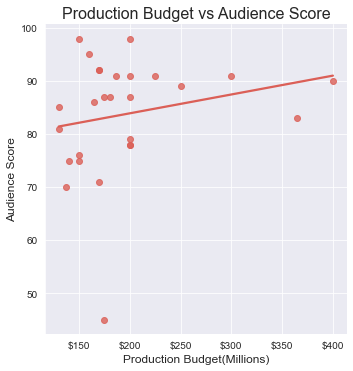

In [25]:
#Production Budget vs Audience Score
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
x='production_budget', 
y='audience_score',
ci=None)
plt.title('Production Budget vs Audience Score',fontsize=16)
plt.xlabel('Production Budget(Millions)',fontsize=12)
plt.ylabel('Audience Score',fontsize=12)
plt.xticks([150000000,200000000,250000000,300000000,350000000,400000000],labels=['$150','$200','$250','$300','$350','$400'])

([<matplotlib.axis.YTick at 0x7f84f898ab80>,
 [Text(0, 170000000, '$170'),
  Text(0, 180000000, '$180'),
  Text(0, 190000000, '$190'),
  Text(0, 200000000, '$200'),
  Text(0, 210000000, '$210')])

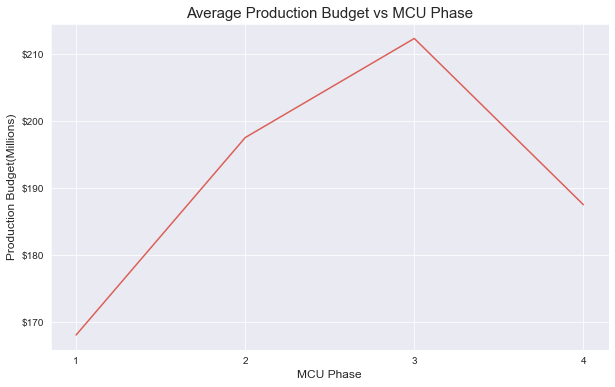

In [26]:
#MCU PHASE VS PRODUCTION BUDGET
plt.figure(figsize=(10,6))
sns.lineplot(
data=marvel, 
y='production_budget', 
x='mcu_phase',
ci=None)
plt.title('Average Production Budget vs MCU Phase',fontsize=15)
plt.ylabel('Production Budget(Millions)',fontsize=12)
plt.xlabel('MCU Phase',fontsize=12)
plt.xticks([1,2,3,4,])
plt.yticks([170000000,180000000,190000000,200000000,210000000],labels=['$170','$180','$190','$200','$210'])

([<matplotlib.axis.XTick at 0x7f84f9f578b0>,
 [Text(150000000, 0, '$150'),
  Text(200000000, 0, '$200'),
  Text(250000000, 0, '$250'),
  Text(300000000, 0, '$300'),
  Text(350000000, 0, '$350'),
  Text(400000000, 0, '$400')])

<Figure size 720x432 with 0 Axes>

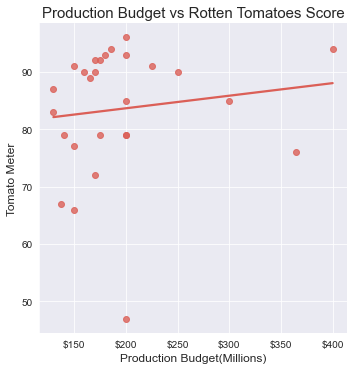

In [27]:
#Tomato Meter Score vs Production Budget
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
x='production_budget', 
y='tomato_meter',
ci=None)
plt.title('Production Budget vs Rotten Tomatoes Score',fontsize=15)
plt.xlabel('Production Budget(Millions)',fontsize=12)
plt.ylabel('Tomato Meter',fontsize=12)
plt.xticks([150000000,200000000,250000000,300000000,350000000,400000000],labels=['$150','$200','$250','$300','$350','$400'])

([<matplotlib.axis.YTick at 0x7f84faba1760>,
 [Text(0, 150000000, '$150'),
  Text(0, 200000000, '$200'),
  Text(0, 250000000, '$250'),
  Text(0, 300000000, '$300'),
  Text(0, 350000000, '$350'),
  Text(0, 400000000, '$400')])

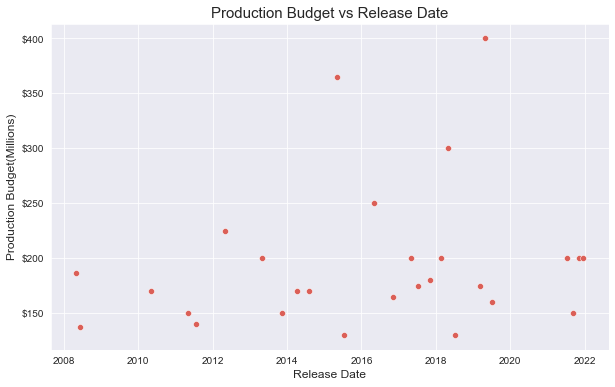

In [28]:
#Release Date vs Production Budget
plt.figure(figsize=(10,6))
sns.scatterplot(
data=marvel, 
y='production_budget', 
x='release_date',
ci=None)
plt.title('Production Budget vs Release Date',fontsize=15)
plt.ylabel('Production Budget(Millions)',fontsize=12)
plt.xlabel('Release Date',fontsize=12)
plt.yticks([150000000,200000000,250000000,300000000,350000000,400000000],labels=['$150','$200','$250','$300','$350','$400'])

([<matplotlib.axis.YTick at 0x7f84fae6f7c0>,
 [Text(0, 150000000, '$150'),
  Text(0, 200000000, '$200'),
  Text(0, 250000000, '$250'),
  Text(0, 300000000, '$300'),
  Text(0, 350000000, '$350'),
  Text(0, 400000000, '$400')])

<Figure size 720x432 with 0 Axes>

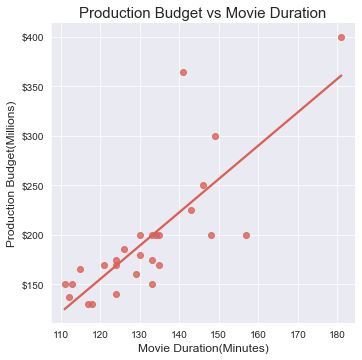

In [29]:
#Movie Duration vs Production Budget
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='production_budget', 
x='movie_duration',
ci=None)
plt.title('Production Budget vs Movie Duration',fontsize=15)
plt.ylabel('Production Budget(Millions)',fontsize=12)
plt.xlabel('Movie Duration(Minutes)',fontsize=12)
plt.yticks([150000000,200000000,250000000,300000000,350000000,400000000],labels=['$150','$200','$250','$300','$350','$400'])

## OPENING BOX OFFICE

([<matplotlib.axis.YTick at 0x7f84faede1f0>,
 [Text(0, 50000000, '$50'),
  Text(0, 100000000, '$100'),
  Text(0, 150000000, '$150'),
  Text(0, 200000000, '$200'),
  Text(0, 250000000, '$250'),
  Text(0, 300000000, '$300'),
  Text(0, 350000000, '$350')])

<Figure size 720x432 with 0 Axes>

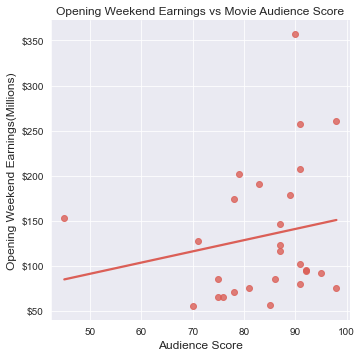

In [30]:
#Audience Score vs Opening Weekend 
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='opening_weekend', 
x='audience_score',
ci=None)
plt.title('Opening Weekend Earnings vs Movie Audience Score',fontsize=12)
plt.ylabel('Opening Weekend Earnings(Millions)',fontsize=12)
plt.xlabel('Audience Score',fontsize=12)
plt.yticks([50000000,100000000,150000000,200000000,250000000,300000000,350000000],
           labels=['$50','$100','$150','$200','$250','$300','$350'])

([<matplotlib.axis.YTick at 0x7f84dfc51a00>,
 [Text(0, 100000000, '$100'),
  Text(0, 110000000, '$110'),
  Text(0, 120000000, '$120'),
  Text(0, 130000000, '$130'),
  Text(0, 140000000, '$140'),
  Text(0, 150000000, '$150'),
  Text(0, 160000000, '$160')])

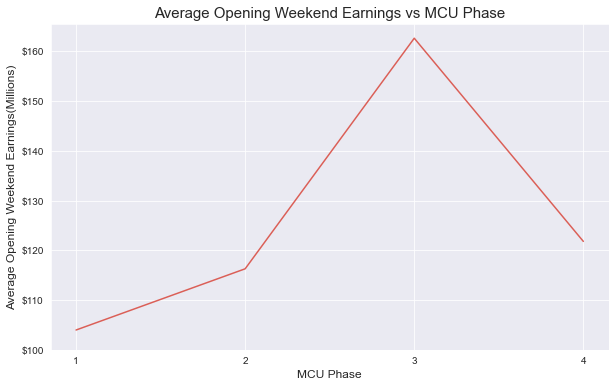

In [71]:
#MCU Phase vs Opening Weekend 
plt.figure(figsize=(10,6))
sns.lineplot(
data=marvel, 
y='opening_weekend', 
x='mcu_phase',
ci=None)
plt.title('Average Opening Weekend Earnings vs MCU Phase',fontsize=15)
plt.ylabel('Average Opening Weekend Earnings(Millions)',fontsize=12)
plt.xlabel('MCU Phase',fontsize=12)
plt.xticks([1,2,3,4,])
plt.yticks([100000000,110000000,120000000,130000000,140000000,150000000,160000000],
          labels=['$100','$110','$120','$130','$140','$150','$160'])

([<matplotlib.axis.YTick at 0x7f84fb2ea220>,
 [Text(0, 50000000, '$50'),
  Text(0, 100000000, '$100'),
  Text(0, 150000000, '$150'),
  Text(0, 200000000, '$200'),
  Text(0, 250000000, '$250'),
  Text(0, 300000000, '$300'),
  Text(0, 350000000, '$350')])

<Figure size 720x432 with 0 Axes>

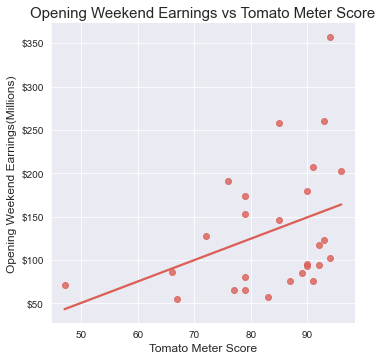

In [32]:
#Tomato Score vs Opening Weekend 
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='opening_weekend', 
x='tomato_meter',
ci=None)
plt.title('Opening Weekend Earnings vs Tomato Meter Score',fontsize=15)
plt.ylabel('Opening Weekend Earnings(Millions)',fontsize=12)
plt.xlabel('Tomato Meter Score',fontsize=12)
plt.yticks([50000000,100000000,150000000,200000000,250000000,300000000,350000000],labels=['$50','$100','$150','$200','$250','$300','$350'])

([<matplotlib.axis.YTick at 0x7f84fecfd100>,
 [Text(0, 50000000, '$50'),
  Text(0, 100000000, '$100'),
  Text(0, 150000000, '$150'),
  Text(0, 200000000, '$200'),
  Text(0, 250000000, '$250'),
  Text(0, 300000000, '$300'),
  Text(0, 350000000, '$350')])

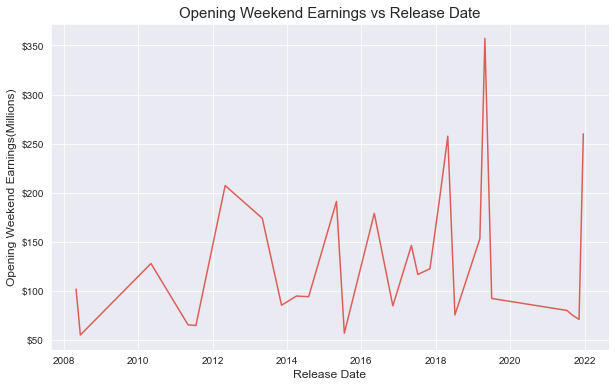

In [62]:
#Release Date vs Opening Weekend 
plt.figure(figsize=(10,6))
sns.lineplot(
data=marvel, 
y='opening_weekend', 
x='release_date',
ci=None)
plt.title('Opening Weekend Earnings vs Release Date',fontsize=15)
plt.ylabel('Opening Weekend Earnings(Millions)',fontsize=12)
plt.xlabel('Release Date',fontsize=12)
plt.yticks([50000000,100000000,150000000,200000000,250000000,300000000,350000000],labels=['$50','$100','$150','$200','$250','$300','$350'])

([<matplotlib.axis.YTick at 0x7f84fb4d7fd0>,
 [Text(0, 50000000, '$50'),
  Text(0, 100000000, '$100'),
  Text(0, 150000000, '$150'),
  Text(0, 200000000, '$200'),
  Text(0, 250000000, '$250'),
  Text(0, 300000000, '$300'),
  Text(0, 350000000, '$350')])

<Figure size 720x432 with 0 Axes>

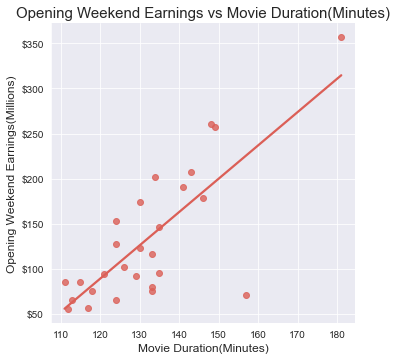

In [34]:
#Movie Duration vs Opening Weekend 
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='opening_weekend', 
x='movie_duration',
ci=None)
plt.title('Opening Weekend Earnings vs Movie Duration(Minutes)',fontsize=15)
plt.ylabel('Opening Weekend Earnings(Millions)',fontsize=12)
plt.xlabel('Movie Duration(Minutes)',fontsize=12)
plt.yticks([50000000,100000000,150000000,200000000,250000000,300000000,350000000],
           labels=['$50','$100','$150','$200','$250','$300','$350'])

([<matplotlib.axis.XTick at 0x7f84fb7e6e50>,
 [Text(50000000, 0, '$50'),
  Text(100000000, 0, '$100'),
  Text(150000000, 0, '$150'),
  Text(200000000, 0, '$200'),
  Text(250000000, 0, '$250'),
  Text(300000000, 0, '$300'),
  Text(350000000, 0, '$350')])

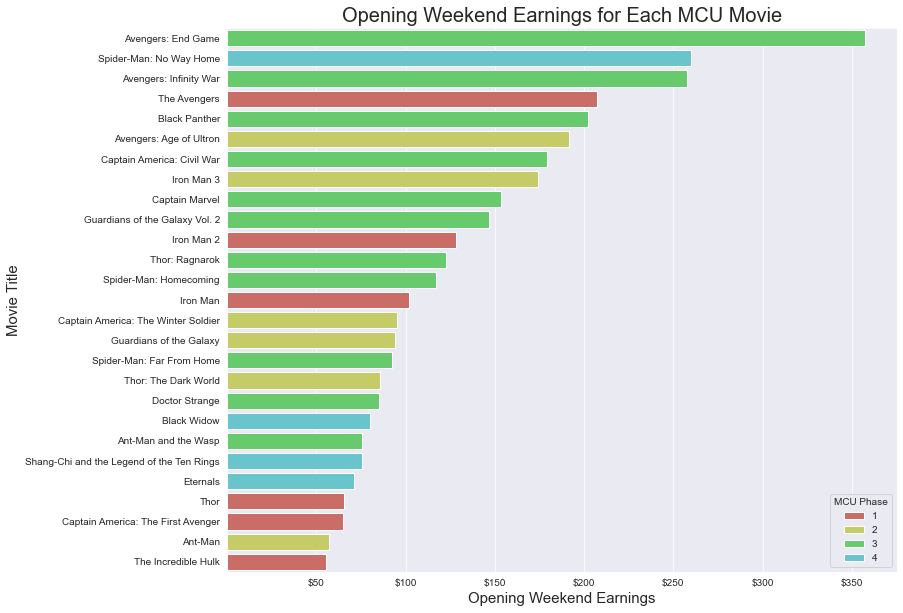

In [35]:
plt.figure(figsize=(12,10))
sns.barplot(
data=marvel, 
x='opening_weekend',
y='movie_title',
hue='mcu_phase',
dodge=False,
order=marvel.groupby('movie_title').opening_weekend.sum().sort_values(ascending=False).index
)
plt.title('Opening Weekend Earnings for Each MCU Movie',fontsize=20)
plt.xlabel('Opening Weekend Earnings',fontsize=15)
plt.ylabel('Movie Title',fontsize=15)
plt.legend(title='MCU Phase')
plt.xticks([50000000,100000000,150000000,200000000,250000000,300000000,350000000],labels=['$50','$100','$150','$200','$250','$300','$350'])

## DOMESTIC BOX OFFICE

([<matplotlib.axis.YTick at 0x7f84fba89f40>,
 [Text(0, 100000000, '$100'),
  Text(0, 200000000, '$200'),
  Text(0, 300000000, '$300'),
  Text(0, 400000000, '$400'),
  Text(0, 500000000, '$500'),
  Text(0, 600000000, '$600'),
  Text(0, 700000000, '$700'),
  Text(0, 800000000, '$800'),
  Text(0, 900000000, '$900')])

<Figure size 720x432 with 0 Axes>

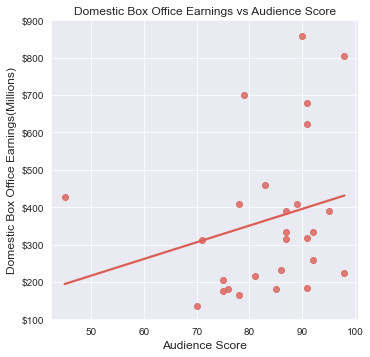

In [36]:
#Audience Score vs Domestic Box Office Earnings
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='domestic_box_office', 
x='audience_score',
ci=None)
plt.title('Domestic Box Office Earnings vs Audience Score')
plt.ylabel('Domestic Box Office Earnings(Millions)',fontsize=12)
plt.xlabel('Audience Score',fontsize=12)
plt.yticks([100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000,900000000],
           labels=['$100','$200','$300','$400','$500','$600','$700','$800','$900'])

([<matplotlib.axis.YTick at 0x7f84fedf7b80>,
 [Text(0, 300000000, '$300'),
  Text(0, 320000000, '$320'),
  Text(0, 340000000, '$340'),
  Text(0, 360000000, '$360'),
  Text(0, 380000000, '$380'),
  Text(0, 400000000, '$400'),
  Text(0, 420000000, '$420'),
  Text(0, 440000000, '$440'),
  Text(0, 460000000, '$460')])

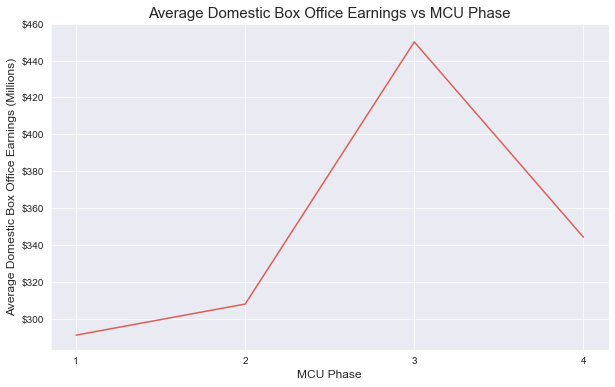

In [63]:
#MCU PHASE VS DOMESTIC BOX OFFICE EARNINGS
plt.figure(figsize=(10,6))
sns.lineplot(
data=marvel, 
y='domestic_box_office', 
x='mcu_phase',
ci=None)
plt.title('Average Domestic Box Office Earnings vs MCU Phase',fontsize=15)
plt.ylabel('Average Domestic Box Office Earnings (Millions)',fontsize=12)
plt.xlabel('MCU Phase',fontsize=12)
plt.xticks([1,2,3,4,])
plt.yticks([300000000,320000000,340000000,360000000,380000000,400000000,420000000,440000000,460000000],
          labels=['$300','$320','$340','$360','$380','$400','$420','$440','$460'])

([<matplotlib.axis.YTick at 0x7f84fbedfc70>,
 [Text(0, 100000000, '$100'),
  Text(0, 200000000, '$200'),
  Text(0, 300000000, '$300'),
  Text(0, 400000000, '$400'),
  Text(0, 500000000, '$500'),
  Text(0, 600000000, '$600'),
  Text(0, 700000000, '$700'),
  Text(0, 800000000, '$800'),
  Text(0, 900000000, '$900')])

<Figure size 720x432 with 0 Axes>

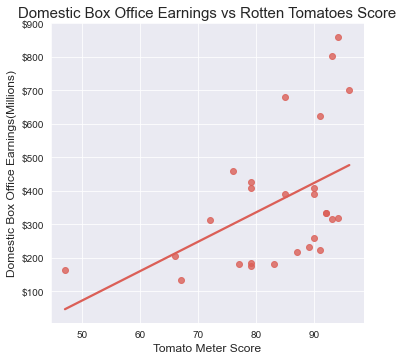

In [38]:
#ROTTEN TOMATOES SCORE VS DOMESTIC BOX OFFICE
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='domestic_box_office', 
x='tomato_meter',
ci=None)
plt.title('Domestic Box Office Earnings vs Rotten Tomatoes Score',fontsize=15)
plt.ylabel('Domestic Box Office Earnings(Millions)',fontsize=12)
plt.xlabel('Tomato Meter Score',fontsize=12)
plt.yticks([100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000,900000000],
           labels=['$100','$200','$300','$400','$500','$600','$700','$800','$900'])

([<matplotlib.axis.YTick at 0x7f84fc115e80>,
 [Text(0, 100000000, '$100'),
  Text(0, 200000000, '$200'),
  Text(0, 300000000, '$300'),
  Text(0, 400000000, '$400'),
  Text(0, 500000000, '$500'),
  Text(0, 600000000, '$600'),
  Text(0, 700000000, '$700'),
  Text(0, 800000000, '$800'),
  Text(0, 900000000, '$900')])

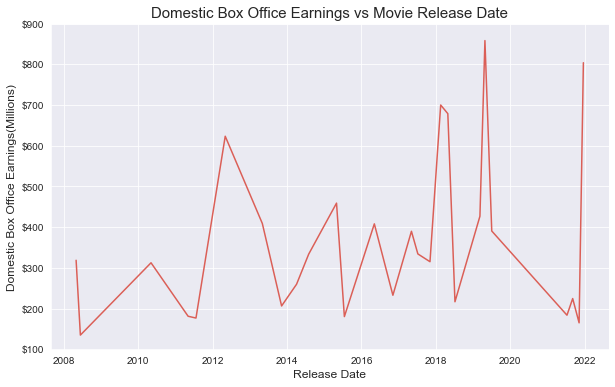

In [39]:
#RELEASE DATE VS DOMESTIC BOX OFFICE EARNINGS
plt.figure(figsize=(10,6))
sns.lineplot(
data=marvel, 
y='domestic_box_office', 
x='release_date',
ci=None)
plt.title('Domestic Box Office Earnings vs Movie Release Date',fontsize=15)
plt.ylabel('Domestic Box Office Earnings(Millions)',fontsize=12)
plt.xlabel('Release Date',fontsize=12)
plt.yticks([100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000,900000000],
           labels=['$100','$200','$300','$400','$500','$600','$700','$800','$900'])

([<matplotlib.axis.YTick at 0x7f84f9f7bee0>,
 [Text(0, 100000000, '$100'),
  Text(0, 200000000, '$200'),
  Text(0, 300000000, '$300'),
  Text(0, 400000000, '$400'),
  Text(0, 500000000, '$500'),
  Text(0, 600000000, '$600'),
  Text(0, 700000000, '$700'),
  Text(0, 800000000, '$800'),
  Text(0, 900000000, '$900')])

<Figure size 720x432 with 0 Axes>

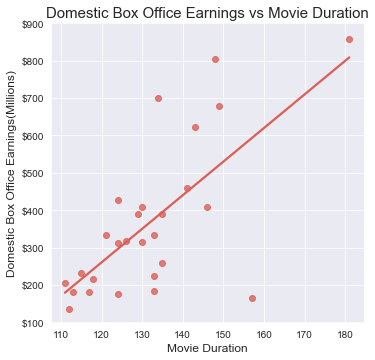

In [64]:
#MOVIE DURATION VS DOMESTIC BOX OFFICE EARNINGS
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='domestic_box_office', 
x='movie_duration',
ci=None)
plt.title('Domestic Box Office Earnings vs Movie Duration',fontsize=15)
plt.ylabel('Domestic Box Office Earnings(Millions)',fontsize=12)
plt.xlabel('Movie Duration',fontsize=12)
plt.yticks([100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000,900000000],
           labels=['$100','$200','$300','$400','$500','$600','$700','$800','$900'])

([<matplotlib.axis.XTick at 0x7f84fc466760>,
 [Text(150000000, 0, '$150'),
  Text(200000000, 0, '$200'),
  Text(250000000, 0, '$250'),
  Text(300000000, 0, '$300'),
  Text(350000000, 0, '$350'),
  Text(400000000, 0, '$400')])

<Figure size 720x432 with 0 Axes>

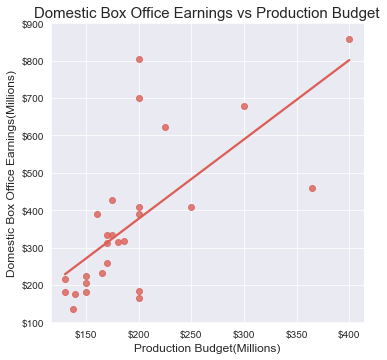

In [41]:
#Production Budget vs Domestic Box Office Earnings
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='domestic_box_office', 
x='production_budget',
ci=None)
plt.title('Domestic Box Office Earnings vs Production Budget',fontsize=15)
plt.ylabel('Domestic Box Office Earnings(Millions)',fontsize=12)
plt.xlabel('Production Budget(Millions)',fontsize=12)
plt.yticks([100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000,900000000],
           labels=['$100','$200','$300','$400','$500','$600','$700','$800','$900'])
plt.xticks([150000000,200000000,250000000,300000000,350000000,400000000],
           labels=['$150','$200','$250','$300','$350','$400'])

([<matplotlib.axis.XTick at 0x7f84fc578f70>,
 [Text(50000000, 0, '$50'),
  Text(100000000, 0, '$100'),
  Text(150000000, 0, '$150'),
  Text(200000000, 0, '$200'),
  Text(250000000, 0, '$250'),
  Text(300000000, 0, '$300'),
  Text(350000000, 0, '$350'),
  Text(400000000, 0, '$400')])

<Figure size 720x432 with 0 Axes>

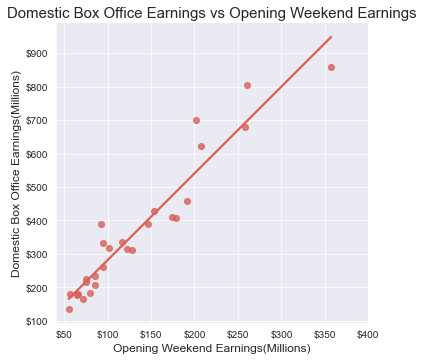

In [42]:
#Opening Weekend vs Domestic Box Office Earnings
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='domestic_box_office', 
x='opening_weekend',
ci=None)
plt.title('Domestic Box Office Earnings vs Opening Weekend Earnings',fontsize=15)
plt.xlabel('Opening Weekend Earnings(Millions)',fontsize=12)
plt.ylabel('Domestic Box Office Earnings(Millions)',fontsize=12)
plt.yticks([100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000,900000000],
           labels=['$100','$200','$300','$400','$500','$600','$700','$800','$900'])
plt.xticks([50000000,100000000,150000000,200000000,250000000,300000000,350000000,400000000],
           labels=['$50','$100','$150','$200','$250','$300','$350','$400'])

([<matplotlib.axis.XTick at 0x7f84e1990eb0>,
 [Text(100000000, 0, '$100'),
  Text(200000000, 0, '$200'),
  Text(300000000, 0, '$300'),
  Text(400000000, 0, '$400'),
  Text(500000000, 0, '$500'),
  Text(600000000, 0, '$600'),
  Text(700000000, 0, '$700'),
  Text(800000000, 0, '$800'),
  Text(900000000, 0, '$900')])

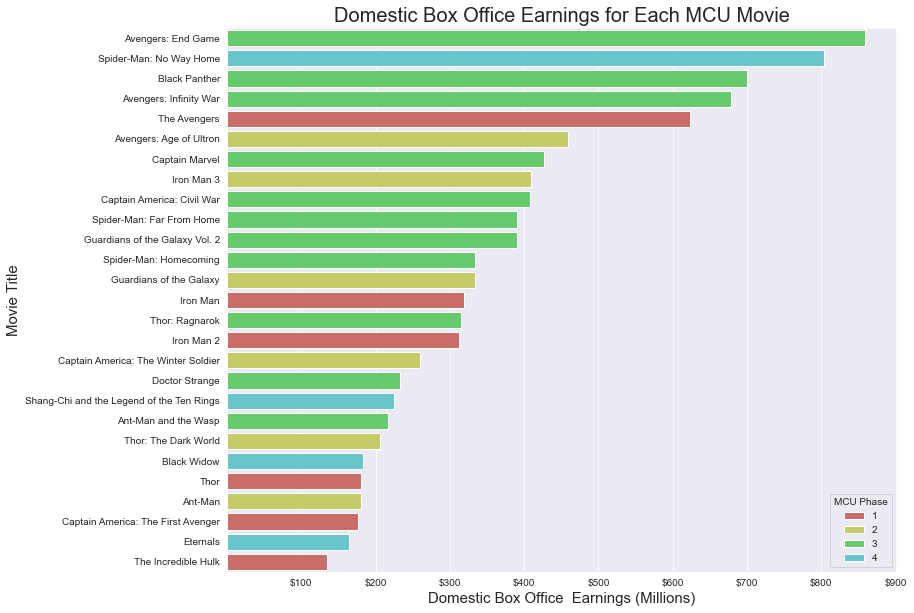

In [73]:
#ALL MCU DOMESITC BOX OFFICE EARNINGS 
plt.figure(figsize=(12,10))
sns.barplot(
data=marvel, 
x='domestic_box_office',
y='movie_title',
hue='mcu_phase',
dodge=False,
order=marvel.groupby('movie_title').domestic_box_office.sum().sort_values(ascending=False).index
)
plt.title('Domestic Box Office Earnings for Each MCU Movie',fontsize=20)
plt.xlabel('Domestic Box Office  Earnings (Millions)',fontsize=15)
plt.ylabel('Movie Title',fontsize=15)
plt.legend(title='MCU Phase')
plt.xticks([100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000,900000000],
           labels=['$100','$200','$300','$400','$500','$600','$700','$800','$900'])

## WORLDWIDE BOX OFFICE

([<matplotlib.axis.YTick at 0x7f84fcb086a0>,
 [Text(0, 700000000, '$700 Million'),
  Text(0, 800000000, '$800 Million '),
  Text(0, 900000000, '$900 Million'),
  Text(0, 1000000000, '$1 Billion'),
  Text(0, 1100000000, '$1.1 Billion'),
  Text(0, 1200000000, '$1.2 Billion')])

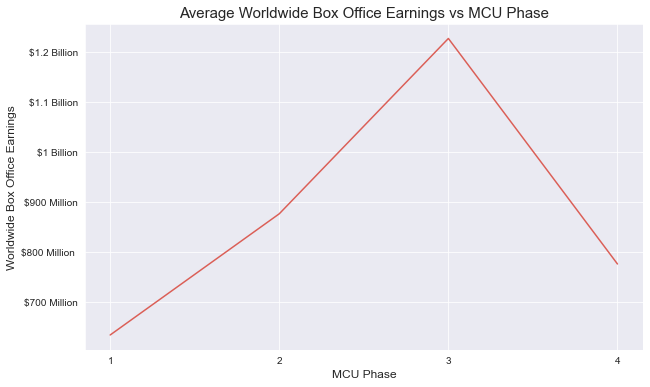

In [44]:
#MCU PHASE VS AVG WORLDWIDE BOX OFFICE EARNINGS
plt.figure(figsize=(10,6))
sns.lineplot(
data=marvel, 
y='worldwide_box_office', 
x='mcu_phase',
ci=None)
plt.title('Average Worldwide Box Office Earnings vs MCU Phase',fontsize=15)
plt.ylabel('Worldwide Box Office Earnings',fontsize=12)
plt.xlabel('MCU Phase',fontsize=12)
plt.xticks([1,2,3,4,])
plt.yticks([700000000,800000000,900000000,1000000000,1100000000,1200000000],
           labels=['$700 Million','$800 Million ','$900 Million','$1 Billion','$1.1 Billion','$1.2 Billion'])

([<matplotlib.axis.YTick at 0x7f84f234ca30>,
 [Text(0, 2000000000, '$2 Billion'),
  Text(0, 4000000000, '$4 Billion'),
  Text(0, 6000000000, '$6 Billion '),
  Text(0, 8000000000, '$8 Billion'),
  Text(0, 10000000000, '$10 Billion'),
  Text(0, 12000000000, '$12 Billion'),
  Text(0, 14000000000, '$14 Billion')])

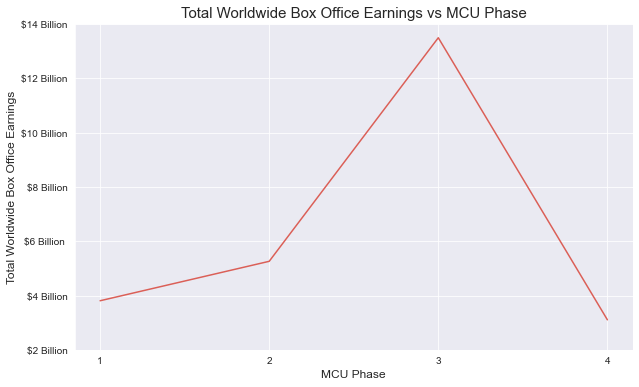

In [45]:
#MCU PHASE VS TOTAL WORLDWIDE BOX OFFICE EARNINGS
plt.figure(figsize=(10,6))
sns.lineplot(
data=marvel, 
y='worldwide_box_office', 
x='mcu_phase',
ci=None,
estimator=sum)
plt.title('Total Worldwide Box Office Earnings vs MCU Phase',fontsize=15)
plt.ylabel('Total Worldwide Box Office Earnings',fontsize=12)
plt.xlabel('MCU Phase',fontsize=12)
plt.xticks([1,2,3,4,])
plt.yticks([2000000000,4000000000,6000000000,8000000000,10000000000,12000000000,14000000000],
           labels=['$2 Billion','$4 Billion','$6 Billion ','$8 Billion','$10 Billion','$12 Billion','$14 Billion'])

([<matplotlib.axis.YTick at 0x7f84fbc1f8b0>,
 [Text(0, 500000000, '$500 Million'),
  Text(0, 1000000000, '$1 Billion '),
  Text(0, 1500000000, '$1.5 Billion'),
  Text(0, 2000000000, '$2 Billion'),
  Text(0, 2500000000, '$2.5 Billion')])

<Figure size 720x432 with 0 Axes>

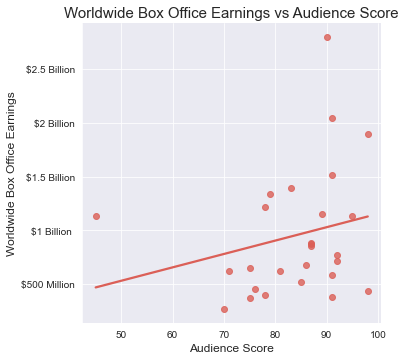

In [46]:
#Audience Score vs Worldwide Box Office Earnings
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='worldwide_box_office', 
x='audience_score',
ci=None)
plt.title('Worldwide Box Office Earnings vs Audience Score',fontsize=15)
plt.ylabel('Worldwide Box Office Earnings',fontsize=12)
plt.xlabel('Audience Score',fontsize=12)
plt.yticks([500000000,1000000000,1500000000,2000000000,2500000000],
           labels=['$500 Million','$1 Billion ','$1.5 Billion','$2 Billion','$2.5 Billion'])

([<matplotlib.axis.YTick at 0x7f84fbc7dd60>,
 [Text(0, 500000000, '$500 Million'),
  Text(0, 1000000000, '$1 Billion '),
  Text(0, 1500000000, '$1.5 Billion'),
  Text(0, 2000000000, '$2 Billion'),
  Text(0, 2500000000, '$2.5 Billion')])

<Figure size 720x432 with 0 Axes>

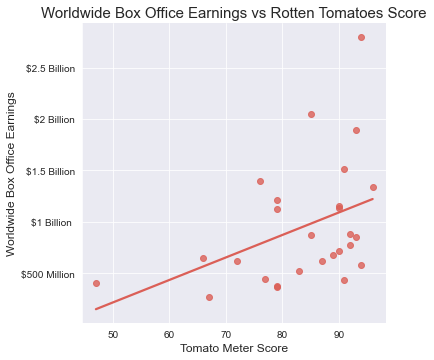

In [47]:
#Rotten Tomatoes Score vs Worldwide Box Office Earnings
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='worldwide_box_office', 
x='tomato_meter',
ci=None)
plt.title('Worldwide Box Office Earnings vs Rotten Tomatoes Score',fontsize=15)
plt.ylabel('Worldwide Box Office Earnings',fontsize=12)
plt.xlabel('Tomato Meter Score',fontsize=12)
plt.yticks([500000000,1000000000,1500000000,2000000000,2500000000],
           labels=['$500 Million','$1 Billion ','$1.5 Billion','$2 Billion','$2.5 Billion'])

##### Eternals Has the lowest Rotten Tomatoes Score and Captain Marvel has the lowest Audience Score. This is a comparison of their worldwide box office earnings:

([<matplotlib.axis.YTick at 0x7f84fbce4430>,
 [Text(0, 250000000, '$250 Million'),
  Text(0, 500000000, '$500 Million'),
  Text(0, 750000000, '$750 Million'),
  Text(0, 1000000000, '$1 Billion '),
  Text(0, 1250000000, '$1.25 Billion')])

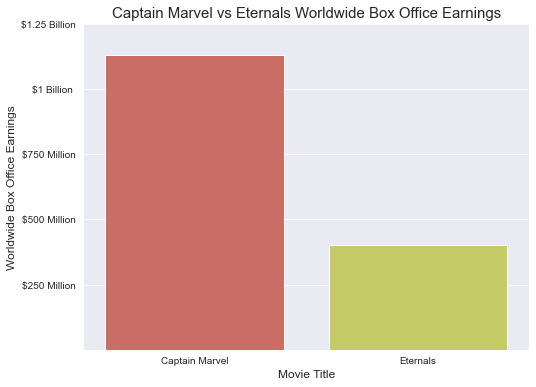

In [48]:
plt.figure(figsize=(8,6))
eternals= marvel.movie_title == 'Eternals'
capt_m= marvel.movie_title == 'Captain Marvel'
comp = marvel[capt_m | eternals]
sns.barplot(
data= comp, 
x='movie_title', 
y='worldwide_box_office',)
plt.title('Captain Marvel vs Eternals Worldwide Box Office Earnings',fontsize=15)
plt.xlabel('Movie Title',fontsize=12)
plt.ylabel('Worldwide Box Office Earnings', fontsize=12)
plt.yticks([250000000,500000000,750000000,1000000000,1250000000],
           labels=['$250 Million','$500 Million','$750 Million','$1 Billion ','$1.25 Billion'])

([<matplotlib.axis.YTick at 0x7f84fd5a8b80>,
 [Text(0, 500000000, '$500 Million'),
  Text(0, 1000000000, '$1 Billion '),
  Text(0, 1500000000, '$1.5 Billion'),
  Text(0, 2000000000, '$2 Billion'),
  Text(0, 2500000000, '$2.5 Billion')])

<Figure size 720x432 with 0 Axes>

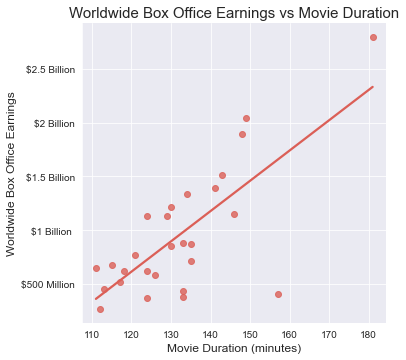

In [49]:
#DURATION VS WORLDWIDE BOX OFFICE EARNINGS
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='worldwide_box_office', 
x='movie_duration',
ci=None)
plt.title('Worldwide Box Office Earnings vs Movie Duration',fontsize=15)
plt.ylabel('Worldwide Box Office Earnings',fontsize=12)
plt.xlabel('Movie Duration (minutes)',fontsize=12)
plt.yticks([500000000,1000000000,1500000000,2000000000,2500000000],
           labels=['$500 Million','$1 Billion ','$1.5 Billion','$2 Billion','$2.5 Billion'])

([<matplotlib.axis.YTick at 0x7f84df1da490>,
 [Text(0, 500000000, '$500 Million'),
  Text(0, 1000000000, '$1 Billion '),
  Text(0, 1500000000, '$1.5 Billion'),
  Text(0, 2000000000, '$2 Billion'),
  Text(0, 2500000000, '$2.5 Billion')])

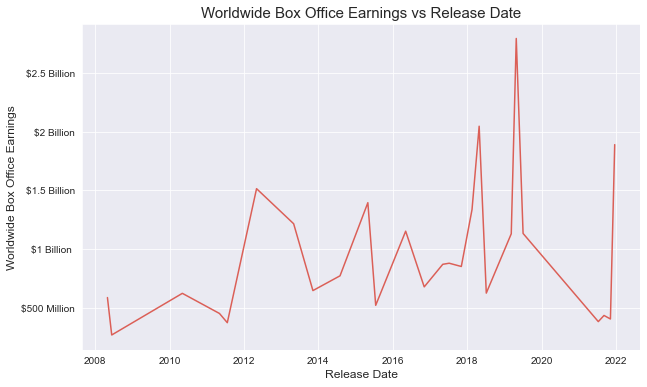

In [65]:
#Release Date vs Worldwide Box Office
plt.figure(figsize=(10,6))
sns.lineplot(
data=marvel, 
x='release_date', 
y='worldwide_box_office'
)
plt.title('Worldwide Box Office Earnings vs Release Date',fontsize=15)
plt.ylabel('Worldwide Box Office Earnings',fontsize=12)
plt.xlabel('Release Date',fontsize=12)
plt.yticks([500000000,1000000000,1500000000,2000000000,2500000000],
           labels=['$500 Million','$1 Billion ','$1.5 Billion','$2 Billion','$2.5 Billion'])

([<matplotlib.axis.XTick at 0x7f84fd685460>,
 [Text(150000000, 0, '$150'),
  Text(200000000, 0, '$200'),
  Text(250000000, 0, '$250'),
  Text(300000000, 0, '$300'),
  Text(350000000, 0, '$350'),
  Text(400000000, 0, '$400')])

<Figure size 720x432 with 0 Axes>

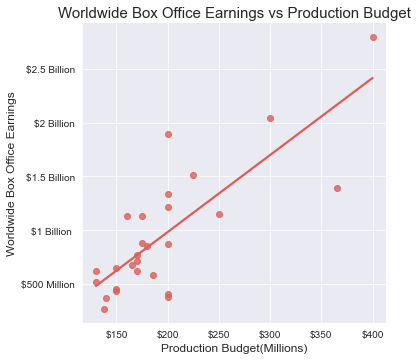

In [51]:
#PRODUCTION BUDGET VS WORLDWIDE BOX OFFICE EARNINGS
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='worldwide_box_office', 
x='production_budget',
ci=None)
plt.title('Worldwide Box Office Earnings vs Production Budget',fontsize=15)
plt.ylabel('Worldwide Box Office Earnings',fontsize=12)
plt.xlabel('Production Budget(Millions)',fontsize=12)
plt.yticks([500000000,1000000000,1500000000,2000000000,2500000000],
           labels=['$500 Million','$1 Billion ','$1.5 Billion','$2 Billion','$2.5 Billion'])
plt.xticks([150000000,200000000,250000000,300000000,350000000,400000000],
           labels=['$150','$200','$250','$300','$350','$400'])

([<matplotlib.axis.XTick at 0x7f84fd7fbb50>,
 [Text(50000000, 0, '$50'),
  Text(100000000, 0, '$100'),
  Text(150000000, 0, '$150'),
  Text(200000000, 0, '$200'),
  Text(250000000, 0, '$250'),
  Text(300000000, 0, '$300'),
  Text(350000000, 0, '$350'),
  Text(400000000, 0, '$400')])

<Figure size 720x432 with 0 Axes>

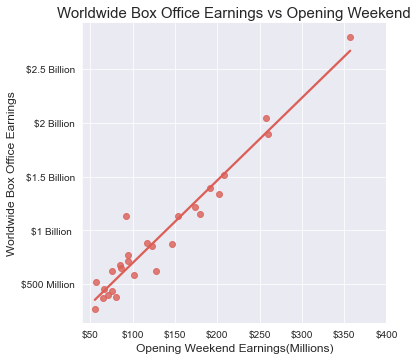

In [52]:
#OPENING WEEKEND VS WORLDWIDE EARNINGS
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='worldwide_box_office', 
x='opening_weekend',
ci=None)
plt.title('Worldwide Box Office Earnings vs Opening Weekend',fontsize=15)
plt.ylabel('Worldwide Box Office Earnings',fontsize=12)
plt.xlabel('Opening Weekend Earnings(Millions)',fontsize=12)
plt.yticks([500000000,1000000000,1500000000,2000000000,2500000000],
           labels=['$500 Million','$1 Billion ','$1.5 Billion','$2 Billion','$2.5 Billion'])
plt.xticks([50000000,100000000,150000000,200000000,250000000,300000000,350000000,400000000],
           labels=['$50','$100','$150','$200','$250','$300','$350','$400'])

([<matplotlib.axis.YTick at 0x7f84fdb14eb0>,
 [Text(0, 500000000, '$500 Million'),
  Text(0, 1000000000, '$1 Billion '),
  Text(0, 1500000000, '$1.5 Billion'),
  Text(0, 2000000000, '$2 Billion'),
  Text(0, 2500000000, '$2.5 Billion')])

<Figure size 720x432 with 0 Axes>

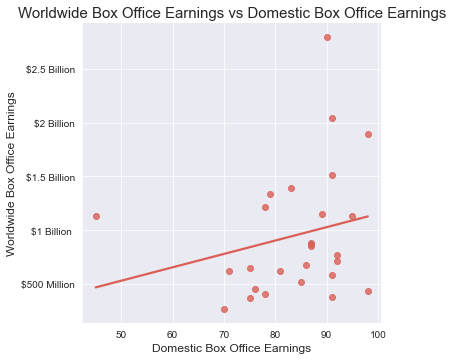

In [53]:
#DOMESTIC VS WORLDWIDE EARNINGS
plt.figure(figsize=(10,6))
sns.lmplot(
data=marvel, 
y='worldwide_box_office', 
x='audience_score',
ci=None)
plt.title('Worldwide Box Office Earnings vs Domestic Box Office Earnings',fontsize=15)
plt.ylabel('Worldwide Box Office Earnings',fontsize=12)
plt.xlabel('Domestic Box Office Earnings',fontsize=12)
plt.yticks([500000000,1000000000,1500000000,2000000000,2500000000],
           labels=['$500 Million','$1 Billion ','$1.5 Billion','$2 Billion','$2.5 Billion'])

([<matplotlib.axis.XTick at 0x7f84fde059a0>,
 [Text(500000000, 0, '$500 Million'),
  Text(1000000000, 0, '$1 Billion '),
  Text(1500000000, 0, '$1.5 Billion'),
  Text(2000000000, 0, '$2 Billion'),
  Text(2500000000, 0, '$2.5 Billion')])

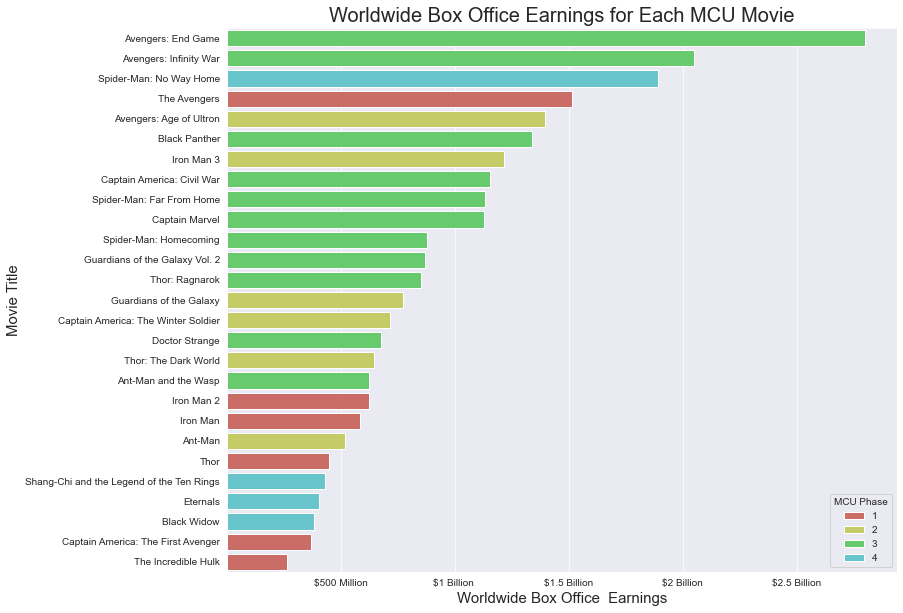

In [54]:
#WORLDWIDE EARNINGS FOR ALL MCU MOVIES
plt.figure(figsize=(12,10))
sns.barplot(
data=marvel, 
x='worldwide_box_office',
y='movie_title',
hue='mcu_phase',
dodge=False,
order=marvel.groupby('movie_title').worldwide_box_office.sum().sort_values(ascending=False).index
)
plt.title('Worldwide Box Office Earnings for Each MCU Movie',fontsize=20)
plt.xlabel('Worldwide Box Office  Earnings',fontsize=15)
plt.ylabel('Movie Title',fontsize=15)
plt.legend(title='MCU Phase')
plt.xticks([500000000,1000000000,1500000000,2000000000,2500000000],
           labels=['$500 Million','$1 Billion ','$1.5 Billion','$2 Billion','$2.5 Billion'])

## RELEASE MONTH/DAY/YEAR/DAY OF THE WEEK

([<matplotlib.axis.YTick at 0x7f84fe07b1f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

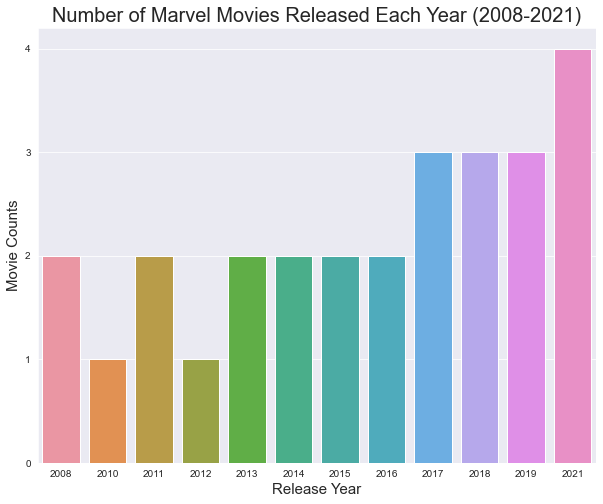

In [55]:
#COUNT OF RELEASE YEARS 
plt.figure(figsize=(10,8))
sns.countplot(
data=marvel, 
x='release_year',)
plt.title('Number of Marvel Movies Released Each Year (2008-2021)',fontsize=20)
plt.xlabel('Release Year',fontsize=15)
plt.ylabel('Movie Counts',fontsize=15)
plt.yticks([0,1,2,3,4])


([<matplotlib.axis.XTick at 0x7f84fe370490>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

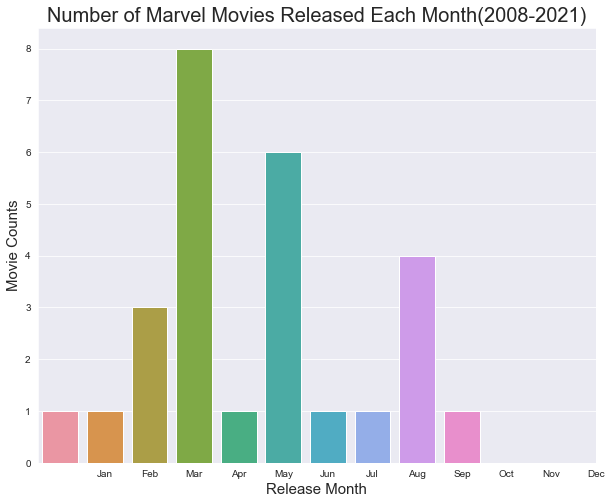

In [56]:
#COUNT OF RELEASE MONTHS
plt.figure(figsize=(10,8))
sns.countplot(
data=marvel, 
x='release_month',)
plt.title('Number of Marvel Movies Released Each Month(2008-2021)',fontsize=20)
plt.xlabel('Release Month',fontsize=15)
plt.ylabel('Movie Counts',fontsize=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

([<matplotlib.axis.YTick at 0x7f84df3cf550>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

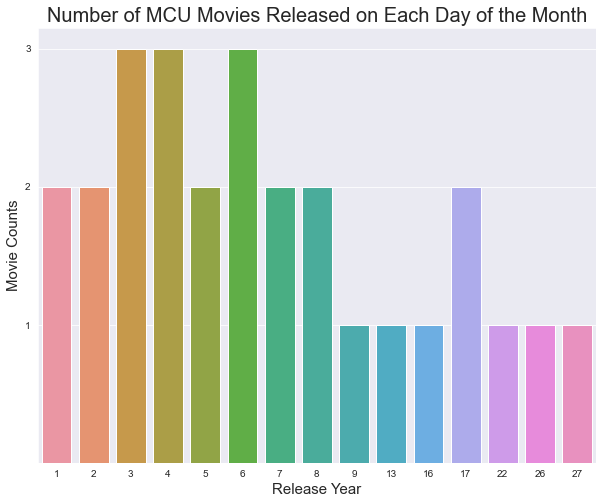

In [66]:
#COUNT OF RELEASE DAY OF MONTH
plt.figure(figsize=(10,8))
sns.countplot(
data=marvel, 
x='release_day',)
plt.title('Number of MCU Movies Released on Each Day of the Month',fontsize=20)
plt.xlabel('Release Year',fontsize=15)
plt.ylabel('Movie Counts',fontsize=15)
plt.yticks([1,2,3])

Text(0, 0.5, 'Movie Counts')

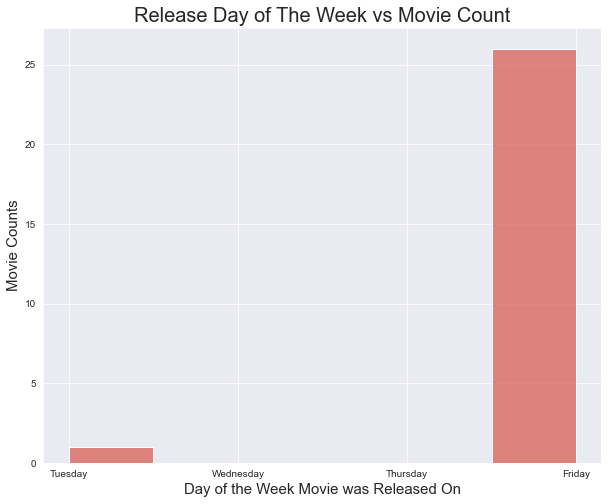

In [58]:
#COUNT OF RELEASE DAY OF WEEK
plt.figure(figsize=(10,8))
sns.histplot(
data=marvel, 
x='release_day_of_week')
plt.xticks([1,2,3,4],labels=['Tuesday','Wednesday','Thursday','Friday'])
plt.title('Release Day of The Week vs Movie Count',fontsize=20)
plt.xlabel('Day of the Week Movie was Released On',fontsize=15)
plt.ylabel('Movie Counts',fontsize=15)

#### Spider Man: Far From Home released on a Tuesday on July 2nd, 2019 in preparation for the fourth of July Holiday in the US:

In [59]:
marvel[marvel.release_day_of_week == 1]

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office,release_month,release_day,release_day_of_week,release_year
22,Spider-Man: Far From Home,3,2019-07-02,90,95,129,160000000,92579212,390532085,1132532832,7,2,1,2019
